In [12]:
import numpy as np
import pandas as pd
from utils import *
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import KFold

data="dataset/YT_revenue.csv"
cols = ["Watch time (hours)", "Likes", "Dislikes", "Subscribers gained", "YouTube ad revenue (TWD)"]
df=pd.read_csv(data,sep=',')
df = df[cols]
df=shuffle(df,random_state=1)

reg_gt=np.array(df['YouTube ad revenue (TWD)'])
clf_gt = np.array(get_class(reg_gt))
df = df.drop(columns= ['YouTube ad revenue (TWD)'])
df = preprocessing.scale(df)

[ 4306.067  2915.734  2868.319   229.063  2149.112  2155.515   725.843
  1888.677  1537.749  2414.67   1737.758  4759.248  1391.915  1853.074
  1939.349   942.896  1285.686  3221.583  2327.091  2816.802   851.365
  3429.7    2511.853  7713.231   346.52    956.554  3406.547  1613.545
  3424.396  1296.188  1342.81   1860.056  6723.444  2739.819  5540.313
   999.177  4331.54   2010.485  3392.243   689.629  1111.143  1374.93
  2251.124   717.685  2015.35    902.38   8246.979  2095.873  2642.45
  2040.996  1412.093  1633.034  2353.087  1108.797  3379.594  4078.862
   442.782  2874.044  1330.575  2326.485  6459.366   309.853   287.847
   151.031   511.24   1298.554  3189.667   231.773  3832.95   3816.91
  1589.634   379.247  1031.239   187.779  2105.39   1615.114  1453.286
  5813.727  2124.297  9468.734  2073.86   7083.922  1587.027  2390.832
  3577.529  2241.87   2268.303  5242.786  1901.987  3793.476  4032.337
   694.908  1303.936  3208.756   760.66    587.79   3391.517  1904.732
  5140.97

In [13]:
from sklearn.model_selection import train_test_split, KFold
X_train, X_test, y_train_reg, y_test_reg = train_test_split(df, reg_gt, test_size=0.2, random_state=1)
_, _, y_train_clf, _ = train_test_split(df, clf_gt, test_size=0.2, random_state=1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
#TODO EDA

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

accuracy: 0.6216216216216216
confusion matrix:
[[ 3  0  0  1]
 [ 2  9  5  0]
 [ 0  2  1  1]
 [ 0  2  1 10]]
precision score of each label [0.6        0.69230769 0.14285714 0.83333333]
recall score of each label [0.75       0.5625     0.25       0.76923077]
accuracy: 0.5135135135135135
confusion matrix:
[[7 2 0 0]
 [3 7 0 1]
 [0 6 0 5]
 [0 1 0 5]]
precision score of each label [0.7        0.4375     0.         0.45454545]
recall score of each label [0.77777778 0.63636364 0.         0.83333333]
accuracy: 0.4864864864864865
confusion matrix:
[[3 4 0 0]
 [0 9 8 1]
 [0 3 1 0]
 [0 1 2 5]]
precision score of each label [1.         0.52941176 0.09090909 0.83333333]
recall score of each label [0.42857143 0.5        0.25       0.625     ]
accuracy: 0.5945945945945946
confusion matrix:
[[5 3 0 1]
 [0 5 3 1]
 [0 2 5 5]
 [0 0 0 7]]
precision score of each label [1.    0.5   0.625 0.5  ]
recall score of each label [0.55555556 0.55555556 0.41666667 1.        ]
accuracy: 0.4722222222222222
confusion m

c:\Users\jerryyyyy708\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


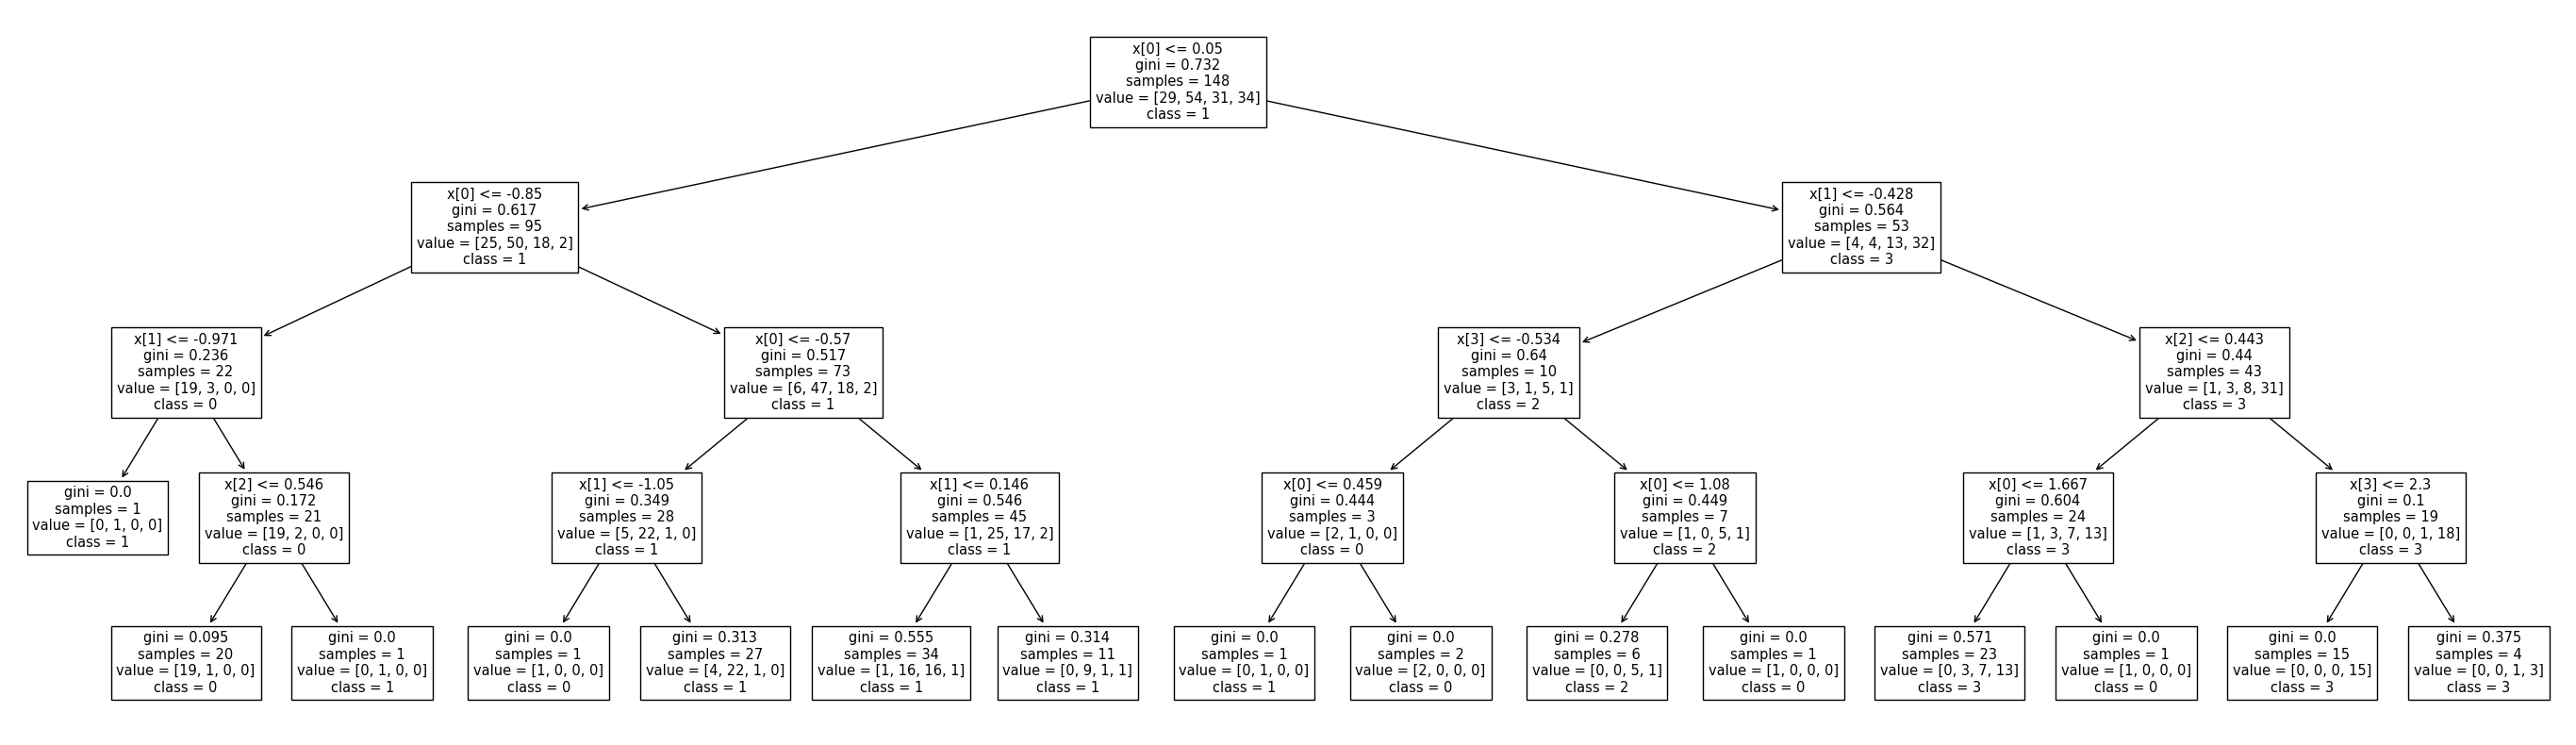

In [16]:
#TODO Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for train_index, test_index in kf.split(X_train, y_train_clf):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train_clf[train_index], y_train_clf[test_index]
    model=DecisionTreeClassifier(max_depth=4,random_state=2)
    model.fit(X_train_fold, y_train_fold)
    ypredict=model.predict(X_test_fold)

    #show result
    print("accuracy:",model.score(X_test_fold, y_test_fold))
    print()
    # print("confusion matrix:")
    # print(confusion_matrix(y_test_fold, ypredict))
    # print("precision score of each label",precision_score(y_test_fold, ypredict, average=None))
    # print("recall score of each label",recall_score(y_test_fold, ypredict, average=None))
fig=plt.figure(figsize=(35,10))
_=tree.plot_tree(model,class_names=['0','1','2','3'])

In [ ]:
#TODO Random Forest
for train_index, test_index in kf.split(X_train, y_train_clf):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train_clf[train_index], y_train_clf[test_index]

In [ ]:
#TODO Linear Regression/Classify based on regression
for train_index, test_index in kf.split(X_train, y_train_reg):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train_reg[train_index], y_train_reg[test_index]

In [ ]:
#TODO Deep Learning (Classifier)

In [ ]:
#TODO Deep Learning (Regression)